In [ ]:
# Web Scraper 
### @Author : Woojin Park, Nidhi Bhaskar
### @Copyright : 2020, Neolth NSF grant NLP project 
### @Email : woojinpa@andrew.cmu.edu , nidhibha@andrew.cmu.edu
### @Status : Production

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import requests
import json
import re
import time

In [2]:
##Build a Time Conversion function  :From Utc

In [54]:
def dateConvert(year,month,day) :
    day = dt.date(year,month,day)
    return int(day.strftime("%s"))

In [93]:
dateConvert(2010,5,22)

1274500800

In [56]:
dateConvert(2020,5,22)

1590120000

In [92]:
print(dt.datetime.fromtimestamp(1274500800))
print(dt.datetime.fromtimestamp(1590120000))

2010-11-21 00:00:00
2020-05-22 00:00:00


In [58]:
## Put the URL of Pushshift api
pushshift_reddit = "http://api.pushshift.io/reddit"

In [94]:
def fetchObjects(**kwargs):
    # Default paramaters for API query : will be used to requests.get(), for GET-style URL parameters
    params = {
        "sort_type":"created_utc",
        "sort":"asc",
        "size":1000, ##maximum size api can return
        "before" : dateConvert(2020,5,22) 
        }

    # Add additional paramters based on function arguments
    for key,value in kwargs.items():
        params[key] = value

    # Print API query paramaters
    print(params)

    # Set the type variable based on function input
    # The type can be "comment" or "submission", default is "comment"
    type = "comment"
    
    if 'type' in kwargs and kwargs['type'].lower() == "submission":
        type = "submission"
    
    # Perform an API request
    r = requests.get(pushshift_reddit + "/" + type + "/search/", params=params, timeout=30)

    # Check the status code successful or not
    if r.status_code == 200: #  200 means : http server response successfully 
        response = json.loads(r.text)
        data = response['data']
        sorted_data_by_id = sorted(data, key=lambda x: int(x['id'],36))
        
        return sorted_data_by_id

In [99]:
def extract_reddit_data(**kwargs):
    # Speficify the start timestamp
    max_created_utc = dateConvert(2010,5,22) 
    max_id = 0
    print("Scrap subreddit data from", dt.datetime.fromtimestamp(dateConvert(2010,5,22))," to ", \
                              dt.datetime.fromtimestamp(dateConvert(2020,5,22))) 
    # Open a file for JSON output
    file = open("submissions_depressed.json","a")

    # While loop for recursive function
    while 1:
        nothing_processed = True
        # Call the recursive function
        objects = fetchObjects(**kwargs, after=max_created_utc)
        
        # Loop the returned data, ordered by date
        for object in objects:
            id = int(object['id'],36)
            if id > max_id:
                nothing_processed = False
                created_utc = object['created_utc']
                max_id = id
                if created_utc > max_created_utc: max_created_utc = created_utc
                # Output JSON data to the opened file
                print(json.dumps(object,sort_keys=True, ensure_ascii=True),file=file)
        
        # Exit if nothing happened
        if nothing_processed: return
        max_created_utc -= 1

        # Sleep a little before the next recursive function call
        time.sleep(.5)
    
# Start program by calling function with:
# 1) Subreddit specified
# 2) The type of data required (comment or submission)
extract_reddit_data(subreddit="depressed", type="submission")

Scrap subreddit data from 2010-05-22 00:00:00  to  2020-05-22 00:00:00
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'depressed', 'type': 'submission', 'after': 1274500800}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'depressed', 'type': 'submission', 'after': 1441835702}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'depressed', 'type': 'submission', 'after': 1481132106}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'depressed', 'type': 'submission', 'after': 1499293270}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'depressed', 'type': 'submission', 'after': 1520649282}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'depressed', 'type': 'submission', 'after': 1542912415}
{'sort_type': 'created_utc', 'sort'

In [100]:
from pprint import pprint

with open('submissions_depressed.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")



In [101]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [102]:
import pandas as pd
data =pd.DataFrame(data)
pprint(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26640 entries, 0 to 26639
Data columns (total 90 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  15913 non-null  object 
 1   allow_live_comments            14557 non-null  object 
 2   author                         26640 non-null  object 
 3   author_flair_css_class         0 non-null      object 
 4   author_flair_richtext          19817 non-null  object 
 5   author_flair_text              0 non-null      object 
 6   author_flair_type              19817 non-null  object 
 7   author_fullname                21469 non-null  object 
 8   author_patreon_flair           17905 non-null  object 
 9   awarders                       11931 non-null  object 
 10  can_mod_post                   22213 non-null  object 
 11  contest_mode                   24282 non-null  object 
 12  created_utc                    26640 non-null 

In [103]:
data.head(2)

all_awardings allow_live_comments         author author_flair_css_class  \
0            []               False  simply-sarah-                   None   
1            []               False     matlockICM                   None   

  author_flair_richtext author_flair_text author_flair_type author_fullname  \
0                    []              None              text     t2_4877j9tg   
1                    []              None              text     t2_4vyfyhrq   

  author_patreon_flair awarders can_mod_post contest_mode  created_utc  \
0                False       []        False        False   1574379958   
1                False       []        False        False   1574381143   

           domain                                          full_link gildings  \
0  self.depressed  https://www.reddit.com/r/depressed/comments/dz...       {}   
1  self.depressed  https://www.reddit.com/r/depressed/comments/dz...       {}   

       id is_crosspostable is_meta is_original_content is_reddit_media_domain  \
0  dzsaw4             True   False               False                  False   
1  dzske4             True   False               False                  False   

  is_robot_indexable  is_self is_video link_flair_background_color  \
0               True     True    False                               
1               True     True    False                               

  link_flair_richtext link_flair_text_color link_flair_type locked media_only  \
0                  []                  dark            text  False      False   
1                  []                  dark            text  False      False   

  no_follow  num_comments  num_crossposts  over_18  \
0      True             3             0.0    False   
1      True             1             0.0    False   

                                           permalink pinned  retrieved_on  \
0  /r/depressed/comments/dzsaw4/today_was_great_u...  False  1.574380e+09   
1                /r/depressed/comments/dzske4/alone/  False  1.574381e+09   

   score                                           selftext send_replies  \
0      1  I felt genuinely happy today for the first tim...         True   
1      1  Not even the people that know I'm fucked up ch...         True   

  spoiler steward_reports stickied  subreddit subreddit_id  \
0   False              []    False  depressed     t5_2r8rq   
1   False              []    False  depressed     t5_2r8rq   

   subreddit_subscribers subreddit_type thumbnail  \
0                14364.0         public      self   
1                14364.0         public      self   

                             title  total_awards_received  \
0  Today was great until it wasn’t                    0.0   
1                           Alone.                    0.0   

                                                 url post_hint preview  \
0  https://www.reddit.com/r/depressed/comments/dz...       NaN     NaN   
1  https://www.reddit.com/r/depressed/comments/dz...       NaN     NaN   

  removed_by author_premium author_flair_background_color  \
0        NaN            NaN                           NaN   
1        NaN            NaN                           NaN   

  author_flair_text_color banned_by removed_by_category author_cakeday  \
0                     NaN       NaN                 NaN            NaN   
1                     NaN       NaN                 NaN            NaN   

   edited treatment_tags crosspost_parent crosspost_parent_list distinguished  \
0     NaN            NaN              NaN                   NaN           NaN   
1     NaN            NaN              NaN                   NaN           NaN   

   upvote_ratio  gilded media_embed secure_media_embed  author_created_utc  \
0           NaN     NaN         NaN                NaN                 NaN   
1           NaN     NaN         NaN                NaN                 NaN   

  media secure_media brand_safe  suggested_sort link_flair_css_class  \
0   NaN          NaN        Na

In [104]:
reddit_data = data[['author','over_18','title','selftext','num_comments', 'score', 'full_link','created_utc']]

In [105]:
reddit_data.isnull().sum()

author           0
over_18          0
title            0
selftext        52
num_comments     0
score            0
full_link        0
created_utc      0
dtype: int64

In [106]:
reddit_data = reddit_data.dropna()
reddit_data.isnull().sum()

author          0
over_18         0
title           0
selftext        0
num_comments    0
score           0
full_link       0
created_utc     0
dtype: int64

In [107]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26588 entries, 0 to 26639
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        26588 non-null  object
 1   over_18       26588 non-null  bool  
 2   title         26588 non-null  object
 3   selftext      26588 non-null  object
 4   num_comments  26588 non-null  int64 
 5   score         26588 non-null  int64 
 6   full_link     26588 non-null  object
 7   created_utc   26588 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 1.6+ MB


In [108]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = reddit_data["created_utc"].apply(get_date)
reddit_data = reddit_data.assign(timestamp = _timestamp)

In [109]:
reddit_data.head(5)

author  over_18                                              title  \
0  simply-sarah-    False                    Today was great until it wasn’t   
1     matlockICM    False                                             Alone.   
2   What_I_do_45    False  I'm so dead inside I don't know how to feel mo...   
3   What_I_do_45    False                                    I feel so alone   
4   gonna_go_die    False                               I don't know anymore   

                                            selftext  num_comments  score  \
0  I felt genuinely happy today for the first tim...             3      1   
1  Not even the people that know I'm fucked up ch...             1      1   
2  I hate using my brain to solve problems. I hat...             0      1   
3  I don't have any friends after all these years...             9      1   
4  Am I the only one that feels empty? Numb? Like...             1      1   

                                           full_link  created_utc  \
0  https://www.reddit.com/r/depressed/comments/dz...   1574379958   
1  https://www.reddit.com/r/depressed/comments/dz...   1574381143   
2  https://www.reddit.com/r/depressed/comments/dz...   1574383781   
3  https://www.reddit.com/r/depressed/comments/dz...   1574384469   
4  https://www.reddit.com/r/depressed/comments/dz...   1574386212   

            timestamp  
0 2019-11-21 18:45:58  
1 2019-11-21 19:05:43  
2 2019-11-21 19:49:41  
3 2019-11-21 20:01:09  
4 2019-11-21 20:30:12

In [110]:
reddit_data.describe(include ='all').transpose()

count unique                                                top  \
author        26588   8009                                          [deleted]   
over_18       26588      2                                              False   
title         26588  11162                                I can’t stop crying   
selftext      26588  10225                                          [deleted]   
num_comments  26588    NaN                                                NaN   
score         26588    NaN                                                NaN   
full_link     26588  12137  https://www.reddit.com/r/depressed/comments/g2...   
created_utc   26588    NaN                                                NaN   
timestamp     26588  12134                                2019-12-27 02:35:58   

               freq               first                last         mean  \
author         1934                 NaT                 NaT          NaN   
over_18       26544                 NaT                 NaT          NaN   
title            72                 NaT                 NaT          NaN   
selftext       1467                 NaT                 NaT          NaN   
num_comments    NaN                 NaT                 NaT       3.4053   
score           NaN                 NaT                 NaT      3.42339   
full_link         3                 NaT                 NaT          NaN   
created_utc     NaN                 NaT                 NaT  1.54578e+09   
timestamp         6 2010-08-28 21:21:56 2020-05-22 14:39:15          NaN   

                    std          min          25%          50%          75%  \
author              NaN          NaN          NaN          NaN          NaN   
over_18             NaN          NaN          NaN          NaN          NaN   
title               NaN          NaN          NaN          NaN          NaN   
selftext            NaN          NaN          NaN          NaN          NaN   
num_comments    4.93488            0            1            2            4   
score             6.271            0            1            1            3   
full_link           NaN          NaN          NaN          NaN          NaN   
created_utc   4.874e+07  1.28304e+09  1.51808e+09  1.56471e+09  1.58219e+09   
timestamp           NaN          NaN          NaN          NaN          NaN   

                      max  
author                NaN  
over_18               NaN  
title                 NaN  
selftext              NaN  
num_comments          102  
score                 109  
full_link             NaN  
created_utc   1.59017e+09  
timestamp             NaN

In [111]:
reddit_data['over_18'] = reddit_data['over_18'].astype('str')

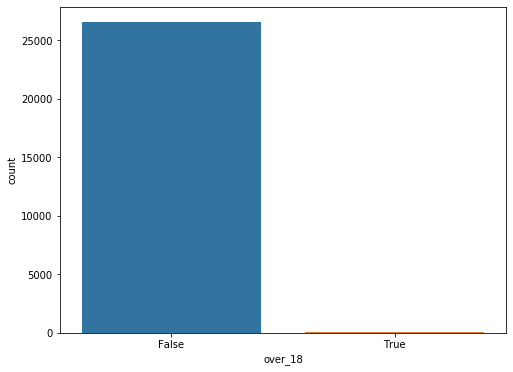

In [112]:
plt.figure(figsize=(8,6))
sns.countplot(x='over_18', data =reddit_data)

In [113]:
count_df = reddit_data.groupby(by=['score']).count().reset_index()
count_df= count_df.rename(columns={'author': 'number of users'})
count_df =count_df.iloc[:,[0,1]]
count_df.transpose()

0      1     2     3     4     5    6    7    8    9   10  \
score              0      1     2     3     4     5    6    7    8    9   10   
number of users  369  15046  2757  2395  1102  1081  845  518  405  290  189   

                  11   12  13  14  15  16  17  18  19  20  21  22  23  24  25  \
score             11   12  13  14  15  16  17  18  19  20  21  22  23  24  25   
number of users  150  126  87  86  72  80  61  62  58  47  62  56  60  57  30   

                 26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  \
score            26  27  28  29  30  31  32  33  34  35  36  37  38  39  40   
number of users  36  53  34  39  16  27  19  18  16  22  19   8  10  33  10   

                 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  \
score            41  42  43  44  45  46  47  48  49  52  53  54  55  56  57   
number of users  14  17   4   2  10   6   6   4   2   8   2   2   6   4   2   

                 56  57  58  59  60  61  62  63  64  65  66  67  68   69   70  
score            59  60  61  63  64  65  69  71  73  80  84  91  99  100  109  
number of users   7   7   6   3   2   2   2   2   2   3   2   3   2    3    2

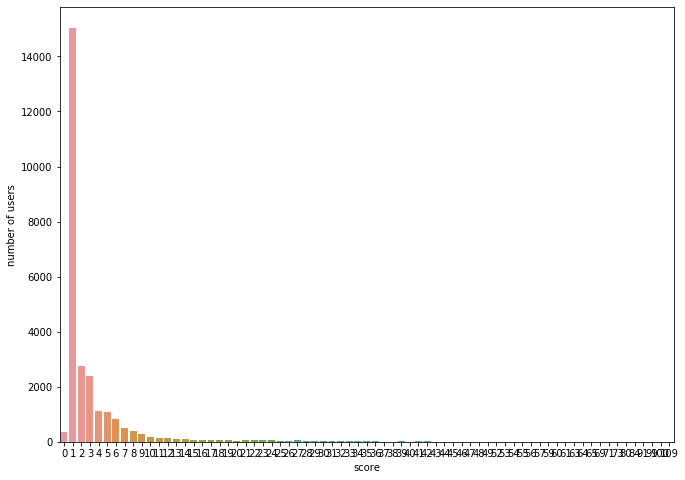

In [114]:
plt.figure(figsize=(11,8))
sns.barplot(x= 'score', y= 'number of users', data =count_df)

In [115]:
count_df = reddit_data.groupby(by=['num_comments']).count().reset_index()
count_df= count_df.rename(columns={'author': 'number of users'})
count_df =count_df.iloc[:,[0,1]]
count_df.transpose()

0     1     2     3     4     5     6    7    8    9   10  \
num_comments        0     1     2     3     4     5     6    7    8    9   10   
number of users  6324  4702  4234  2883  2152  1406  1033  771  607  491  400   

                  11   12   13   14   15  16  17  18  19  20  21  22  23  24  \
num_comments      11   12   13   14   15  16  17  18  19  20  21  22  23  24   
number of users  226  281  119  111  122  82  92  51  90  48  47  40  27  35   

                 25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  \
num_comments     25  26  27  28  29  30  31  32  33  34  35  36  37  38  39   
number of users  37  10  23  13  13  16  11   9   8   2   9   2   2   5   7   

                 40  41  42  43  44  45  46  47  48  49  50  51   52  
num_comments     41  43  46  47  48  51  56  58  59  66  77  78  102  
number of users   2   7   4   6   2   6   2   2   2   3   5   3    3

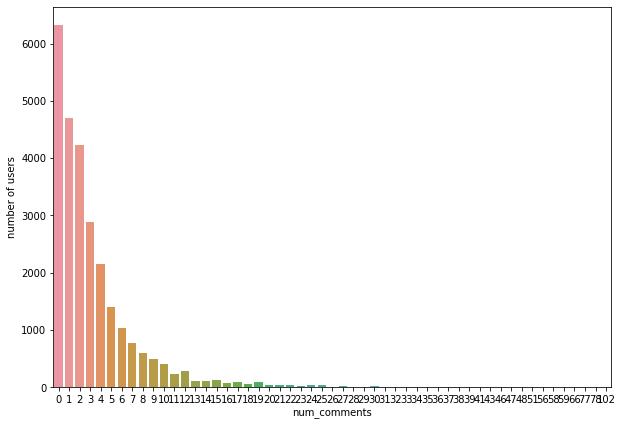

In [116]:
plt.figure(figsize=(10,7))
sns.barplot(x= 'num_comments', y= 'number of users', data =count_df)

In [117]:
reddit_data['selftext'].tail(5).to_list()

["Or raise a glass, I guess, if that's what you're into.  I am occasionally.\n\nMy HS class-mates have graduated, most with Bachelors', some with Masters'\n\nI am a goddamn mess and like I don't know how to fix my life and get out of my parents' house while doing something I love because I don't really believe in myself and what I'm doing right now is not the thing that I wanna do with my life. I don't think.  I could definitely force myself to study and learn all the shit but I won't love it.  And this is the kind of career that you have to love in order to not go crazy and burn out.  This is just what I'm doing to keep my parents happy and eventually graduate and get a great job.  Honestly, all I wanna do is skip all the school and go into the great job because I've been here so long and I'm just not doing anything right. I wish I could leave this house finally and go somewhere else and just learn how to be an adult and learn how to take responsibility for myself. \n\n&amp;#x200B;\n\

In [118]:
reddit_data.tail(10)

author over_18  \
26629           poorbadluck   False   
26631     Idontlikeyourkids   False   
26632  smith_and_jones4ever   False   
26633         SpareSomeWeed   False   
26634             evamarshx   False   
26635  FlimsyInitiative2020   False   
26636      kimberlytheclown   False   
26637           fazelfareed   False   
26638          Rose_Skull16   False   
26639              Aseida34   False   

                                                   title  \
26629                                         I give up.   
26631  Anyone else shuffling through life just waitin...   
26632  I've been feeling this heavy weight and vague ...   
26633                     Self medication and loneliness   
26634                                        another day   
26635  I just wrapped up my 5th year at a two year co...   
26636  when logic said “i don’t wanna be alive” i fel...   
26637  The pain won’t stop and nothing seems to help ...   
26638                     I feel unemotionally emotional   
26639  Am I the only one who wishes they could just r...   

                                                selftext  num_comments  score  \
26629  &amp;#x200B;\n\nsome says I'm too young to be ...             1      1   
26631  Pretty self explanatory.\n\nI'm basically a fa...            15      2   
26632  I don't know what I'm doing with my life. I am...             0      1   
26633  So basically I’m 17 and my brother is 18 and m...             0      1   
26634  \ni literally feel crazy, i could hit my head ...             0      1   
26635  Or raise a glass, I guess, if that's what you'...             3      1   
26636                                          [removed]             2      1   
26637  (M 18 )I’ve was diagnosed as having “chronic d...             2      1   
26638  It’s confusing, I don’t know what I feel but m...             2      1   
26639  I’m over myself and my life. I hate who I am. ...            32      1   

                                               full_link  created_utc  \
26629  https://www.reddit.com/r/depressed/comments/gn...   1590078226   
26631  https://www.reddit.com/r/depressed/comments/go...   1590083521   
26632  https://www.reddit.com/r/depressed/comments/go...   1590103730   
26633  https://www.reddit.com/r/depressed/comments/go...   1590105443   
26634  https://www.reddit.com/r/depressed/comments/go...   1590105653   
26635  https://www.reddit.com/r/depressed/comments/go...   1590108744   
26636  https://www.reddit.com/r/depressed/comments/go...   1590114544   
26637  https://www.reddit.com/r/depressed/comments/go...   1590114698   
26638  https://www.reddit.com/r/depressed/comments/go...   1590114840   
26639  https://www.reddit.com/r/depressed/comments/go...   1590118570   

                timestamp  
26629 2020-05-21 12:23:46  
26631 2020-05-21 13:52:01  
26632 2020-05-21 19:28:50  
26633 2020-05-21 19:57:23  
26634 2020-05-21 20:00:53  
26635 2020-05-21 20:52:24  
26636 2020-05-21 22:29:04  
26637 2020-05-21 22:31:38  
26638 2020-05-21 22:34:00  
26639 2020-05-21 23:36:10

In [119]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26588 entries, 0 to 26639
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   author        26588 non-null  object        
 1   over_18       26588 non-null  object        
 2   title         26588 non-null  object        
 3   selftext      26588 non-null  object        
 4   num_comments  26588 non-null  int64         
 5   score         26588 non-null  int64         
 6   full_link     26588 non-null  object        
 7   created_utc   26588 non-null  int64         
 8   timestamp     26588 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.3+ MB


In [120]:
reddit_data[reddit_data['selftext'].str.contains("suicide") == True].count()

author          1617
over_18         1617
title           1617
selftext        1617
num_comments    1617
score           1617
full_link       1617
created_utc     1617
timestamp       1617
dtype: int64

In [121]:
reddit_data[reddit_data['selftext'].str.contains("suicide") == True]['selftext'].head(1).to_list()

['I felt genuinely happy today for the first time in months. My mental health program that I go to is very supportive, and I couldn’t ask for better friends. But, I’m not allowed to speak to them outside of the hospital. So when I go home, I go back into the world of darkness and pain, where my best friend calls me selfish for trying to heal and my ex boyfriend stalks me just to tell me to kill myself because I’m not worth the air I breathe. Then there’s my overbearing mother who can’t even exhale without saying something about my grades, my weight, or my life choices. Then, when I finally have someone who can hang out with me and show me they care, they blow me off last minute and crush my heart. Earlier this week I was practicing writing suicide notes and my tears stained the pages. I just don’t understand why nobody cares about me anymore in my real life. The three hours I spend at the hospital every day aren’t enough. I can’t just go to this perfect friend group and then forget abo

In [122]:
reddit_data[reddit_data['selftext'].str.contains("suicidal") == True].count()

author          1338
over_18         1338
title           1338
selftext        1338
num_comments    1338
score           1338
full_link       1338
created_utc     1338
timestamp       1338
dtype: int64

In [123]:
reddit_data[reddit_data['selftext'].str.contains("suicidal") == True]['selftext'].tail(1).to_list()

["&amp;#x200B;\n\nsome says I'm too young to be worrying about my future.\n\nsome says things will get better eventually. \n\nsome just don't care,but it is not their fault. \n\nI'm currently waiting for my degree interview result (which i didn't put much hope on).What a stupid decision.To be honest,I'm not that brilliant nor gifted yet I had the gut to apply to this prestigious university.The audacity.\n\nAnyhow, I kept telling myself to study hard so I can repay my parents for their good deeds-but in reality,I know I will never get to do so because they're too old. My parents are pushing 70. I'm growing old and so do they.However,it hurts to see them living in poverty.  Mom couldn't eat properly now because her teeth are broken and we cannot afford to do dentures,all the savings go to the bills and my studying. My father's salary is less than 300 USD per month.I'm also trying to save money by buying old,preloved clothes and not eating properly at college.Everyone is struggling in thi

In [124]:
reddit_data[reddit_data['selftext'].str.contains("depressed") == True].count()

author          4668
over_18         4668
title           4668
selftext        4668
num_comments    4668
score           4668
full_link       4668
created_utc     4668
timestamp       4668
dtype: int64

In [125]:
reddit_data[reddit_data['selftext'].str.contains("depressed") == True]['selftext'].tail(1).to_list()

["RANT: Everything seems to be going wrong this year and my depression has only gotten worse since the year started. I've been trying to workout, learn new things and work towards new goals and search for new opportunities especially in my career, but nothing seems to be working out. All the things I want to do seem impossible. I'm heartbroken, hurt and SO depressed. Idk what to do."]

In [126]:
reddit_data[reddit_data['selftext'].str.contains("depression") == True].count()

author          4344
over_18         4344
title           4344
selftext        4344
num_comments    4344
score           4344
full_link       4344
created_utc     4344
timestamp       4344
dtype: int64

In [90]:
reddit_data[reddit_data['selftext'].str.contains("depression") == True]['selftext'].tail(1).to_list()

['(M 18 )I’ve was diagnosed as having “chronic depression” at the age of 14. I took anti depressants for 4 years and 2 months ago stopped taking them because of “sexual side effects”. I have a loving girlfriend who would do anything for me. Since January I’ve been having these sharp stabbing chest pains in the heart area, I thought I was having a heart attack the first few times I had them and went to the er 5 times through the beginning of January this year. They thought it might be paracarditis and gave me anti inflammatories for a month and after that I went again exclaiming the pains were still there every day and all they said was that it is probably acute anxiety and gave me a low 6 day supply of ativan. Fast forward 5 months to now and I’m now on 1mg a day of Ativan prescribed for “extreme anxiety”. It wasn’t enough and I would still have these chest pains so I tried self medicating with another benzo like substance called etizolam. I’m now at the point where I’m taking almost 2